In [ ]:
#Importing required modules
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
#loading the dataset
df = pd.read_csv("greenhouse_gases_dataset.csv")

In [3]:
#printing first 5 rows
df.head()

,Emission_ID,Source,Gas_Type,Emission_Quantity (kg),Latitude,Longitude,Date,Neighborhood_Name,Emission_Category,Temperature (°C),Emission_Control
0,1,Industrial,CH4,437,41.920871,-88.219918,2024-01-02,Vincentchester,High,22.956383,No
1,2,Transportation,CO2,158,36.495035,-104.730178,2024-03-03,New Sara,Low,25.810465,No
2,3,Industrial,CO2,37,36.719775,-109.714689,2024-02-27,Cooperborough,High,29.442296,Yes
3,4,Industrial,N2O,497,34.631515,-104.635658,2024-02-19,Port Stephanieville,High,28.118131,Yes
4,5,Transportation,CO2,319,37.542385,-113.907234,2024-02-27,Dylanview,Medium,27.418327,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Emission_ID             2000 non-null   int64  
 1   Source                  2000 non-null   object 
 2   Gas_Type                2000 non-null   object 
 3   Emission_Quantity (kg)  2000 non-null   int64  
 4   Latitude                2000 non-null   float64
 5   Longitude               2000 non-null   float64
 6   Date                    2000 non-null   object 
 7   Neighborhood_Name       2000 non-null   object 
 8   Emission_Category       2000 non-null   object 
 9   Temperature (°C)        2000 non-null   float64
 10  Emission_Control        2000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 172.0+ KB


In [5]:
df.dtypes

Emission_ID                 int64
Source                     object
Gas_Type                   object
Emission_Quantity (kg)      int64
Latitude                  float64
Longitude                 float64
Date                       object
Neighborhood_Name          object
Emission_Category          object
Temperature (°C)          float64
Emission_Control           object
dtype: object

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Emission_ID,2000.0,NaN,NaN,NaN,1000.5,577.494589,1.0,500.75,1000.5,1500.25,2000.0
Source,2000,3,Transportation,689,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gas_Type,2000,3,CO2,696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Emission_Quantity (kg),2000.0,NaN,NaN,NaN,255.3015,140.717982,10.0,132.75,254.0,378.25,499.0
Latitude,2000.0,NaN,NaN,NaN,37.948207,2.296673,34.000246,35.986502,37.870651,39.904798,41.990343
Longitude,2000.0,NaN,NaN,NaN,-96.278457,12.647774,-117.989396,-107.244623,-96.448025,-85.31613,-74.02373
Date,2000,365,2024-02-17,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neighborhood_Name,2000,1868,Michaelside,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Emission_Category,2000,3,Low,682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature (°C),2000.0,NaN,NaN,NaN,24.985007,2.864211,20.001852,22.564348,24.966368,27.401918,29.996356


In [7]:
#checking for missing values
df.isnull().sum()

Emission_ID               0
Source                    0
Gas_Type                  0
Emission_Quantity (kg)    0
Latitude                  0
Longitude                 0
Date                      0
Neighborhood_Name         0
Emission_Category         0
Temperature (°C)          0
Emission_Control          0
dtype: int64

In [8]:
#datatype conversion
df['Date'] = pd.to_datetime(df['Date'])  
df['Emission_Quantity (kg)'] = df['Emission_Quantity (kg)'].astype(float)  

In [9]:
#label encoding
label_encoder = LabelEncoder()
df['Gas_Type_Encoded'] = label_encoder.fit_transform(df['Gas_Type'])
print(df[['Gas_Type', 'Gas_Type_Encoded']].head())

  Gas_Type  Gas_Type_Encoded
0      CH4                 0
1      CO2                 1
2      CO2                 1
3      N2O                 2
4      CO2                 1


In [10]:
#one hot encoding
df = pd.get_dummies(df, columns=['Source', 'Gas_Type', 'Emission_Category', 'Emission_Control'])

In [11]:
#data feature extraction
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday

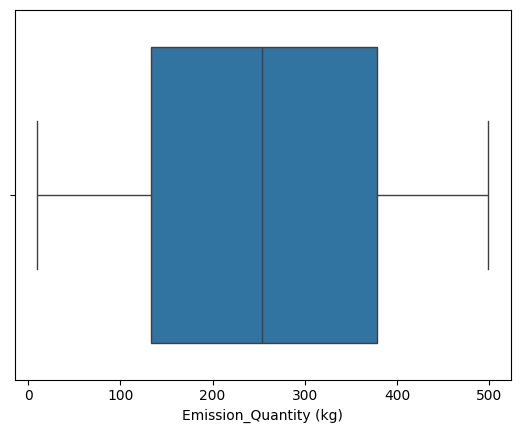

In [12]:
#checking for outliers
sns.boxplot(x=df['Emission_Quantity (kg)'])
plt.show()

In [13]:
#feature engineering
df['Emission_Severity'] = np.where(df['Emission_Quantity (kg)'] > df['Emission_Quantity (kg)'].median(), 'High', 'Low')

In [14]:
#removing duplicates
df.drop_duplicates(inplace=True)

In [15]:
#dataframe to csv file
df.to_csv("Nasa_data.csv")

DATA VISUALIZATION

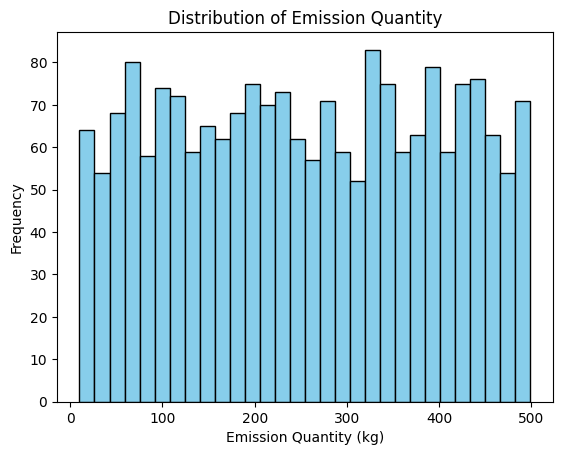

In [16]:
#Histogram
plt.hist(df['Emission_Quantity (kg)'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Emission Quantity')
plt.xlabel('Emission Quantity (kg)')
plt.ylabel('Frequency')
plt.show()

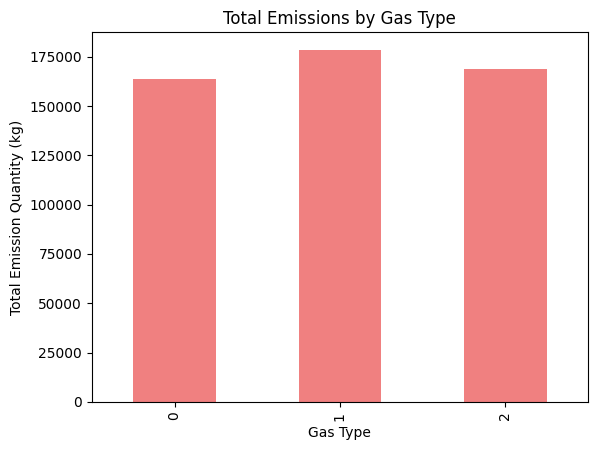

In [17]:
#Bar chart
df.groupby('Gas_Type_Encoded')['Emission_Quantity (kg)'].sum().plot(kind='bar', color='lightcoral')
plt.title('Total Emissions by Gas Type')
plt.xlabel('Gas Type')
plt.ylabel('Total Emission Quantity (kg)')
plt.show()

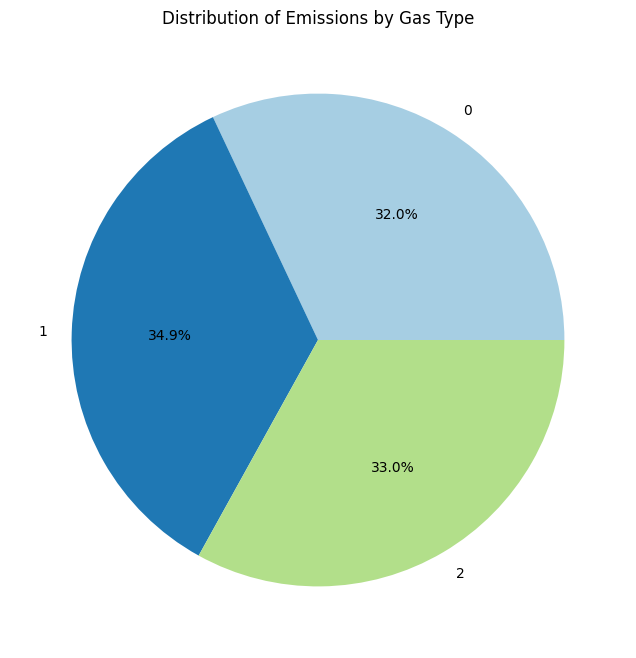

In [18]:
#Pie chart
x=df.groupby('Gas_Type_Encoded')['Emission_Quantity (kg)'].sum()
plt.figure(figsize=(8, 8))
plt.pie(x, labels=x.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(x))))
plt.title('Distribution of Emissions by Gas Type')
plt.show()

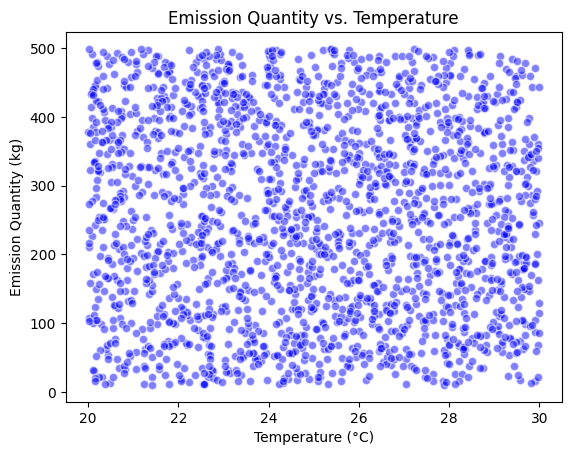

In [19]:
#Scatter plot
plt.scatter(df['Temperature (°C)'], df['Emission_Quantity (kg)'], alpha=0.5, c='b', edgecolors='w')
plt.title('Emission Quantity vs. Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Emission Quantity (kg)')
plt.show()

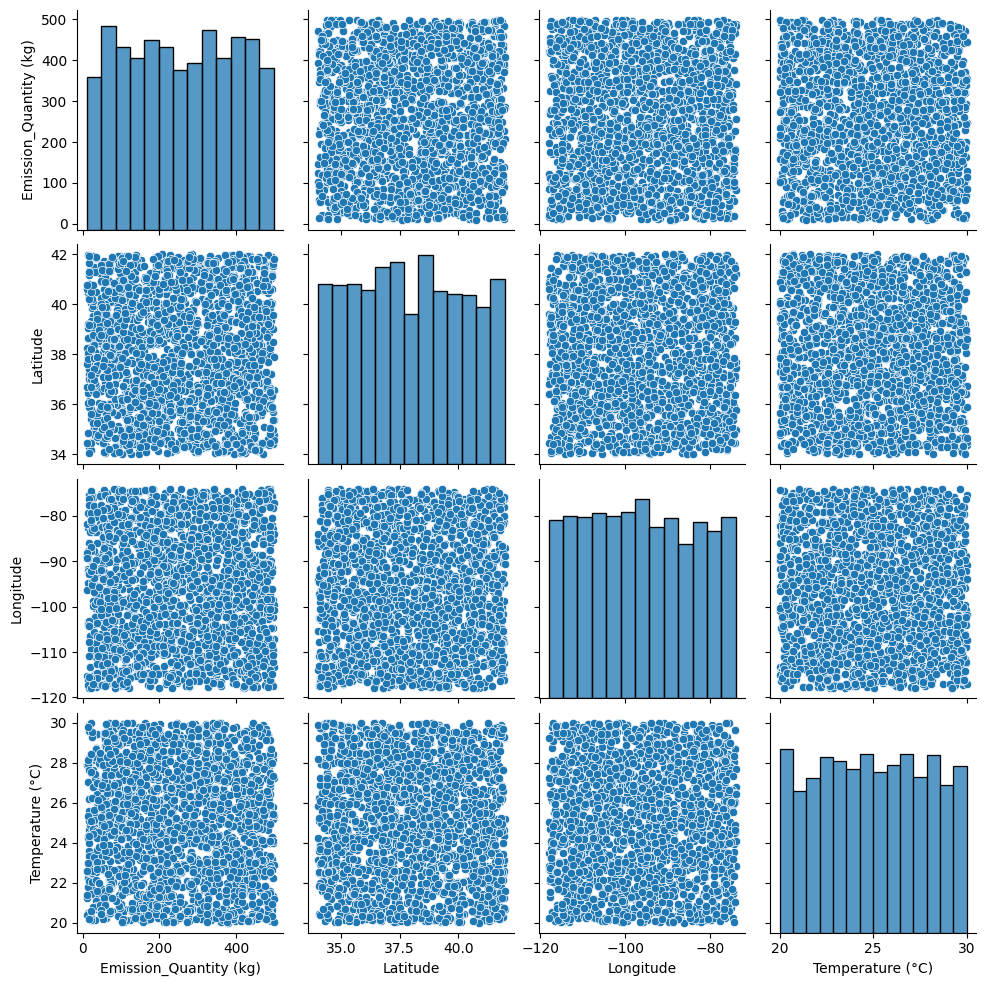

In [20]:
#Pair plot
sns.pairplot(df[['Emission_Quantity (kg)', 'Latitude', 'Longitude', 'Temperature (°C)']])
plt.show()